# پروژه صفر--حسین حامدی جعفری
هدف:پیش بینی نواقص یک دیتاست

In [1]:
#ایمپورت کردن کتابخانه های مورد نیاز

import csv
import numpy as np
import pandas as pd
from math import pow
import time
import scipy.stats as stats
import matplotlib.pyplot as plt

ذخیره فایل دیتاست برای انجام محاسبات

In [2]:
fileName = 'AdmissionPredict.csv'
csvFrame = pd.read_csv(fileName)

این تابع بطور پیش فرض 5 ردیف اول دیتاست را بر می گرداند

In [3]:
csvFrame.head() 

Unnamed: 0  Daily Time Spent on Site   Age  Area Income  \
0           0                     68.95  35.0     61833.90   
1           1                     80.23  31.0     68441.85   
2           2                     69.47  26.0     59785.94   
3           3                     74.15  29.0     54806.18   
4           4                     68.37  35.0     73889.99   

   Daily Internet Usage                          Ad Topic Line  \
0                256.09     Cloned 5thgeneration orchestration   
1                   NaN     Monitored national standardization   
2                236.50       Organic bottom-line service-desk   
3                245.89  Triple-buffered reciprocal time-frame   
4                225.58          Robust logistical utilization   

             City  Gender     Country        Timestamp  Clicked on Ad  
0     Wrightburgh  Female     Tunisia   3/27/2016 0:53            0.0  
1       West Jodi    Male       Nauru    4/4/2016 1:39            0.0  
2        Davidton  Female  San Marino  3/13/2016 20:35            0.0  
3  West Terrifurt    Male       Italy   1/10/2016 2:31            0.0  
4    South Manuel  Female     Iceland    6/3/2016 3:36            0.0

این تابع بطور پیش فرض 5 ردیف انتهایی دیتاست را بر می گرداند

In [4]:
csvFrame.tail()

Unnamed: 0  Daily Time Spent on Site   Age  Area Income  \
995         995                     72.97  30.0     71384.57   
996         996                     51.30  45.0     67782.17   
997         997                     51.63  51.0     42415.72   
998         998                     55.55  19.0     41920.79   
999         999                       NaN  26.0     29875.80   

     Daily Internet Usage                         Ad Topic Line  \
995                208.58         Fundamental modular algorithm   
996                134.42       Grass-roots cohesive monitoring   
997                120.37          Expanded intangible solution   
998                187.95  Proactive bandwidth-monitored policy   
999                178.35       Virtual 5thgeneration emulation   

              City  Gender                 Country        Timestamp  \
995      Duffystad    Male                 Lebanon  2/11/2016 21:49   
996    New Darlene    Male  Bosnia and Herzegovina   4/22/2016 2:07   
997  South Jessica    Male                Mongolia   2/1/2016 17:24   
998    West Steven  Female               Guatemala   3/24/2016 2:35   
999    Ronniemouth  Female                  Brazil   6/3/2016 21:43   

     Clicked on Ad  
995            1.0  
996            1.0  
997            1.0  
998            0.0  
999            1.0

این تابع یک اطلاعات کلی از دیتاست نظیر تعداد هر قسمت میانگین و ... به ما می دهد

In [5]:
csvFrame.describe() 

Unnamed: 0  Daily Time Spent on Site         Age   Area Income  \
count  1000.000000                907.000000  979.000000   1000.000000   
mean    499.500000                 64.794818   36.009193  55000.000080   
std     288.819436                 15.954841    8.783636  13414.634022   
min       0.000000                 32.600000   19.000000  13996.500000   
25%     249.750000                 50.615000   29.000000  47031.802500   
50%     499.500000                 67.940000   35.000000  57012.300000   
75%     749.250000                 78.555000   42.000000  65470.635000   
max     999.000000                 91.430000   61.000000  79484.800000   

       Daily Internet Usage  Clicked on Ad  
count            913.000000     832.000000  
mean             179.751271       0.496394  
std               43.957934       0.500288  
min              104.780000       0.000000  
25%              138.550000       0.000000  
50%              183.480000       0.000000  
75%              217.850000       1.000000  
max              269.960000       1.000000

این تابع نوع داده هر ستون از اطلاعات را بر می گرداند

In [6]:
csvFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  907 non-null    float64
 2   Age                       979 non-null    float64
 3   Area Income               1000 non-null   float64
 4   Daily Internet Usage      913 non-null    float64
 5   Ad Topic Line             1000 non-null   object 
 6   City                      1000 non-null   object 
 7   Gender                    1000 non-null   object 
 8   Country                   1000 non-null   object 
 9   Timestamp                 1000 non-null   object 
 10  Clicked on Ad             832 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


ابتدا ستون جنسیت را انتخاب و سپس با یک شرط آن را تبدیل به صفر و یک تبدیل می کنیم

In [7]:
df = pd.DataFrame(csvFrame,columns=['Gender'])
df= df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
csvFrame['Gender'] = df
print(csvFrame) 

     Unnamed: 0  Daily Time Spent on Site   Age  Area Income  \
0             0                     68.95  35.0     61833.90   
1             1                     80.23  31.0     68441.85   
2             2                     69.47  26.0     59785.94   
3             3                     74.15  29.0     54806.18   
4             4                     68.37  35.0     73889.99   
..          ...                       ...   ...          ...   
995         995                     72.97  30.0     71384.57   
996         996                     51.30  45.0     67782.17   
997         997                     51.63  51.0     42415.72   
998         998                     55.55  19.0     41920.79   
999         999                       NaN  26.0     29875.80   

     Daily Internet Usage                          Ad Topic Line  \
0                  256.09     Cloned 5thgeneration orchestration   
1                     NaN     Monitored national standardization   
2                  236.50  

تعداد خانه های خالی هرستون را بدست اوردیم

In [8]:
csvFrame.isnull().sum() 

Unnamed: 0                    0
Daily Time Spent on Site     93
Age                          21
Area Income                   0
Daily Internet Usage         87
Ad Topic Line                 0
City                          0
Gender                        0
Country                       0
Timestamp                     0
Clicked on Ad               168
dtype: int64

در چهارستون اول میانگین را حساب کرده و در خانه های خالی قرار دادیم

یک روش دیگر برای رسیدن به مشکل خانه های خالی میتواند پر کردن ان ها با استفاده از میانه باشد 

In [9]:
print(csvFrame.mean())
csvFrame[list(csvFrame.iloc[:, [1,2,4]])] = csvFrame[list(csvFrame.iloc[:, [1,2,4]])].fillna(csvFrame.mean()) 




Unnamed: 0                    499.500000
Daily Time Spent on Site       64.794818
Age                            36.009193
Area Income                 55000.000080
Daily Internet Usage          179.751271
Gender                          0.481000
Clicked on Ad                   0.496394
dtype: float64


ابتدا اجزای ستون را با تابع جدا می کنیم . سپس مقدار هر کدام را جدا چاپ می کنیم

In [10]:
df = csvFrame['Gender']   
s = df.value_counts()
Male = s[1]
Female = s[0]
    
print("Male =",Male)
print("Female =",Female)


Male = 481
Female = 519


مانند قبل اجزای ستون کلیک را جدا می کنیم.سپس هرکدام را جدا داخل متغیر می ریزیم

In [11]:
df = csvFrame['Clicked on Ad']
s = df.value_counts()
Click = s[1]
DontClick = s[0]
print("Click =",Click)
print("Dont Click =",DontClick)

Click = 413
Dont Click = 419


با دو شرط :کسانی که مرد هستند و سنشان از 22 بیشتر است را فیلتر می کنیم

In [12]:
filtr = csvFrame[(csvFrame[csvFrame.columns[2]] > 22) & (csvFrame[csvFrame.columns[7]] == 1)]
print('number of user with age > 22 and Gender is Male :',len(filtr))


number of user with age > 22 and Gender is Male : 464


ابتدا کاربرانی که کلیک کرده اند را در یک متغیر و کاربرانی که کلیک نکرده اند را درمتغیری دیگرمی ریزیم
سپس با استفاده از تابع میانگین هر دو را جدا حساب می کنیم
ضمن انجام اینکار تایم سپری شده را نیز حساب میکنیم که چیزی در حد 25میلی ثانیه شد

In [13]:
ClickUser = csvFrame[(csvFrame[csvFrame.columns[10]] == 1)]
DontClickUser = csvFrame[(csvFrame[csvFrame.columns[10]] == 0)]
tic = time.time()
clickMean = ClickUser.mean(axis = 0)[2]
nclickMean = DontClickUser.mean(axis = 0)[2]
toc = time.time()
print('Click -> Average Age :',clickMean)
print('Dont Click -> Average Age :',nclickMean)
print('Vectorization = ',((toc-tic)*1000))

Click -> Average Age : 40.295599848637366
Dont Click -> Average Age : 31.723325881701896
Vectorization =  13.960599899291992


در این قسمت میانگین کسانی که کلیک کرده اند و نکرده اند را از طریق فور لوپ انجام دادیم.به این صورت که روی کل ستون فور زدیم و دو قسمت را جدا کردیم و تعداد
هرکدام هم شماردیم.سپس جمع سن هرکدام را بر تعدادش تقسیم کردیم تا میانگین به دست بیاید
زمان انجام اینکار با فور لوپ هم اندازه گیری شد که حدود 260 میلی ثانیه شد که در حدود 11 برابر بیشتر از حالت قبل شد

In [14]:
df = pd.DataFrame(csvFrame,columns=['Age','Clicked on Ad'])
clickcount = 0
nclickcount = 0
clicksum = 0
nclicksum = 0

tic = time.time()
for row in df.iterrows():
    if(row[1][1] == 1):
        clickcount = clickcount + 1
        clicksum = clicksum + row[1][0]
    elif(row[1][1] == 0):
        nclickcount = nclickcount + 1
        nclicksum = nclicksum + row[1][0]
        
clickaverage = clicksum/clickcount
nclickaverage = nclicksum/nclickcount
toc = time.time()
    
print('Click -> Average:',clickaverage,' DontClick -> Average:',nclickaverage)
print('For Loop = ',((toc-tic)*1000))


Click -> Average: 40.295599848637366  DontClick -> Average: 31.723325881701896
For Loop =  137.84122467041016


در این قسمت با استفاده از تابع گفته شده نمودار 4 ستون اول(عددی)را رسم کردیم

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218FD8A4670>,
      dtype=object)

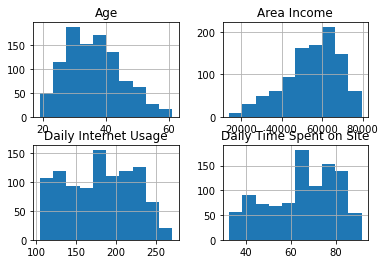

In [15]:
df = pd.DataFrame(csvFrame,columns=['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage'])
df.hist()

ابتدا با استفاده از توابع اماده میانگین و انحراف معیار 4 ستون اول را محاسبه کردیم.و سپس به ازای هر ستون نرمال سازی داده را انجام دادیم

In [16]:
df = pd.DataFrame(csvFrame)
means = df.mean()
sal = df.var()
enheraf = sal**(1/2)
df['Daily Time Spent on Site'] = (df['Daily Time Spent on Site'] - df['Daily Time Spent on Site'].mean()) / df['Daily Time Spent on Site'].std()
csvFrame['Daily Time Spent on Site'] = df['Daily Time Spent on Site']

df['Age'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()
csvFrame['Age'] = df['Age']

df['Area Income'] = (df['Area Income'] - df['Area Income'].mean()) / df['Area Income'].std()
csvFrame['Area Income'] = df['Area Income']

df['Daily Internet Usage'] = (df['Daily Internet Usage'] - df['Daily Internet Usage'].mean()) / df['Daily Internet Usage'].std()
csvFrame['Daily Internet Usage'] = df['Daily Internet Usage']

print(df)

     Unnamed: 0  Daily Time Spent on Site       Age  Area Income  \
0             0                  0.273474 -0.116122     0.509436   
1             1                  1.015870 -0.576377     1.002029   
2             2                  0.307698 -1.151696     0.356770   
3             3                  0.615713 -0.806505    -0.014448   
4             4                  0.235301 -0.116122     1.408163   
..          ...                       ...       ...          ...   
995         995                  0.538051 -0.691441     1.221395   
996         996                 -0.888164  1.034517     0.952853   
997         997                 -0.866445  1.724900    -0.938101   
998         998                 -0.608450 -1.957144    -0.974996   
999         999                  0.000000 -1.151696    -1.872895   

     Daily Internet Usage                          Ad Topic Line  \
0                1.817578     Cloned 5thgeneration orchestration   
1                0.000000     Monitored nationa

ابتدا کسانی که کلیک کرده اند و نکرده اند را جدا می کنیم سپس برای هر کدام میانگین و انحراف معیار را حساب می کنیم
حال برای هر چهار متغیر و برای هر کدام دوبار(کلیک کردن و نکردن) تا رسم را صدا میزنیم.که در این صدا زدن ازگومان اول اعداد محور ایکس
و ارگومان دوم تابع چگالی است که با تابع معرفی شده بدست می آید(با دادن میانگین و انحراف معیار)

انتخاب بهترین نمودار برای تخمین:
از نظر من نمودار اخر که میزان مصرف روزانه را نشان میدهد با توجه به اینکه نمودار چگالی دو بخش کلیک و عدم کلیک از هم فاصله بیشتری دارند نسبت به بقیه نمودار ها از این رو برای تخمین خانه های خالی جدول گزینه مطمین تری می تواند باشد و نقطه تفاوت دو سمت این نمودار تقریبا در عدد -0.2 می باشد که در شرط پایین استفاده شده است
رنگ آبی در نمودار نشانه کلیک کردن و رنگ نارنجی نشان کلیک نکردن است

click means
 Daily Time Spent on Site   -0.691783
Age                         0.493211
Area Income                -0.498632
Daily Internet Usage       -0.753395
dtype: float64
dont click means
 Daily Time Spent on Site    0.714104
Age                        -0.493148
Area Income                 0.476367
Daily Internet Usage        0.764216
dtype: float64
click enheraf
 Daily Time Spent on Site    0.836161
Age                         1.019268
Area Income                 1.046199
Daily Internet Usage        0.723959
dtype: float64
dont click enheraf
 Daily Time Spent on Site    0.531369
Age                         0.706315
Area Income                 0.670476
Daily Internet Usage        0.592058
dtype: float64


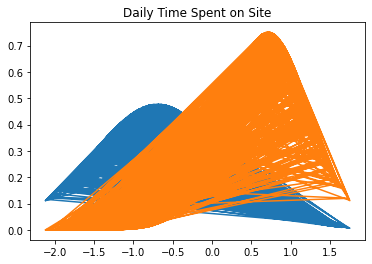

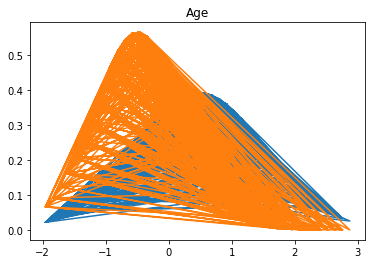

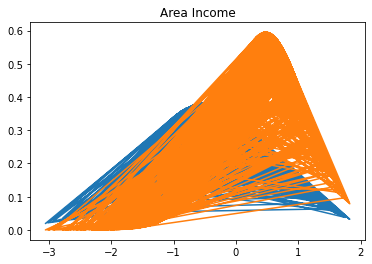

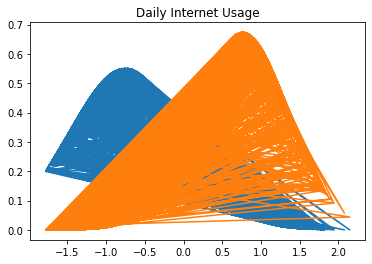

In [17]:
df = pd.DataFrame(csvFrame,columns=['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage'])
ClickUser = csvFrame[(csvFrame[csvFrame.columns[10]] == 1)] #user hayi ke click karde and.
DontClickUser = csvFrame[(csvFrame[csvFrame.columns[10]] == 0)]
ClickUser = ClickUser[list(ClickUser.iloc[:, [1,2,3,4]])]
DontClickUser = DontClickUser[list(DontClickUser.iloc[:, [1,2,3,4]])]

clickmeans = ClickUser.mean()
dontclickmeans = DontClickUser.mean()
print("click means\n",clickmeans)
print("dont click means\n",dontclickmeans)

clickenheraf = (ClickUser.var(axis = 0)**(1/2))
dontclickenheraf = (DontClickUser.var(axis = 0)**(1/2))
print('click enheraf\n',clickenheraf)
print('dont click enheraf\n',dontclickenheraf)

plt.plot(df['Daily Time Spent on Site'] , stats.norm.pdf(df['Daily Time Spent on Site'],clickmeans[0],clickenheraf[0]))
plt.plot(df['Daily Time Spent on Site'] , stats.norm.pdf(df['Daily Time Spent on Site'],dontclickmeans[0],dontclickenheraf[0]))
plt.title('Daily Time Spent on Site')
plt.show()

plt.plot(df['Age'] , stats.norm.pdf(df['Age'],clickmeans[1],clickenheraf[1]))
plt.plot(df['Age'] , stats.norm.pdf(df['Age'],dontclickmeans[1],dontclickenheraf[1]))
plt.title('Age')
plt.show()

plt.plot(df['Area Income'] , stats.norm.pdf(df['Area Income'],clickmeans[2],clickenheraf[2]))
plt.plot(df['Area Income'] , stats.norm.pdf(df['Area Income'],dontclickmeans[2],dontclickenheraf[2]))
plt.title('Area Income')
plt.show()

plt.plot(df['Daily Internet Usage'] , stats.norm.pdf(df['Daily Internet Usage'],clickmeans[3],clickenheraf[3]))
plt.plot(df['Daily Internet Usage'] , stats.norm.pdf(df['Daily Internet Usage'],dontclickmeans[3],dontclickenheraf[3]))
plt.title('Daily Internet Usage')
plt.show()


در این مرحله ابتدا سطر هایی که باید پیش بینی کنیم را جدا می کنیم.سپس با یک شرط و با توجه به نمودار مربوط به "مصرف اینترنت روزانه" پیش بینی میکنیم ستون اخر را
و در نهایت خروجی را با

In [18]:
newdf = csvFrame[csvFrame['Clicked on Ad'].isna()]
df = newdf

df['Clicked on Ad'] = df['Daily Internet Usage'].apply(lambda x: 1 if x <= (-0.2) else 0)
df.to_csv('Final.csv',index=False)
print(df)

     Unnamed: 0  Daily Time Spent on Site       Age  Area Income  \
10           10                 -1.129048  1.494773    -0.698304   
14           14                 -1.437721 -0.346249    -1.790880   
15           15                 -0.088509 -1.496888    -0.210052   
20           20                  0.817766 -0.691441     0.730719   
24           24                 -1.540393  0.574262     1.040827   
..          ...                       ...       ...          ...   
963         963                 -0.266210  0.689325     1.101465   
966         966                 -1.791149  1.839964    -0.253420   
967         967                  0.211608 -1.266760     0.995775   
977         977                 -0.646622 -0.576377    -0.231089   
992         992                  0.287953  0.459198     0.834448   

     Daily Internet Usage                                Ad Topic Line  \
10              -1.374546               Centralized neutral neural-net   
14              -0.861692          

<ipython-input-18-54bd41d696a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clicked on Ad'] = df['Daily Internet Usage'].apply(lambda x: 1 if x <= (-0.2) else 0)
